# Mean-variance optimization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

## Downloading data

In [2]:
# ALL FILES
path = r'C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f, index_col=False) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)

In [54]:
all_files

['C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\Allianz Technology Trust Ord daily.csv',
 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\Fundsmith Equity I Inc daily.csv',
 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\GS India Equity R Inc GBP daily.csv',
 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\HgCapital Trust Ord daily.csv',
 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\iShares Physical Gold ETC GBP.csv',
 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\iShares Physical Silver ETC GBP.csv',
 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\iShares £ Corp Bond 0-5yr ETF GBP Dist.csv',
 'C:\\Users\\Ferhat\\

In [123]:
# SOME FILES
path = r'C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
#sub_files = all_files[1, 3, 4, 7, 8, 13, 14]

indices = [1, 7, 14]
sub_files = []

for index in indices:
    sub_files.append(all_files[index])

df_from_each_file = (pd.read_csv(f, index_col=False) for f in sub_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
sub_files

['C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\Fundsmith Equity I Inc daily.csv',
 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\JPM Global Macro Opportunities C Net Inc daily.csv',
 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\Scottish Mortgage Ord daily.csv']

In [124]:
concatenated_df.drop([ 'High', 'Low', 'Open', 'Volume'], axis=1, inplace=True)

In [125]:
concatenated_df['Close'] = concatenated_df['Close'].fillna(concatenated_df['NAV'])

In [126]:
concatenated_df.drop(['NAV'], axis=1, inplace=True)

In [127]:
concatenated_df

,Date,Name,Close
0,11/01/2010,Fundsmith Equity I Inc,1.0000
1,11/02/2010,Fundsmith Equity I Inc,0.9992
2,11/03/2010,Fundsmith Equity I Inc,1.0003
3,11/04/2010,Fundsmith Equity I Inc,1.0049
4,11/05/2010,Fundsmith Equity I Inc,1.0086
...,...,...,...
26738,01/17/2022,Scottish Mortgage Ord,11.4950
26739,01/18/2022,Scottish Mortgage Ord,11.1850
26740,01/19/2022,Scottish Mortgage Ord,11.1800
26741,01/20/2022,Scottish Mortgage Ord,11.5400


In [128]:
concatenated_df['Name'].unique()

array(['Fundsmith Equity I Inc',
       'JPM Global Macro Opportunities C Net Inc',
       'Scottish Mortgage Ord'], dtype=object)

In [129]:
concatenated_df_pivot = concatenated_df.pivot(columns='Name', values='Close', index='Date')


In [130]:
concatenated_df_pivot

Name,Fundsmith Equity I Inc,JPM Global Macro Opportunities C Net Inc,Scottish Mortgage Ord
Date,,,
01/01/1969,NaN,NaN,0.04852
01/01/1970,NaN,NaN,0.03852
01/01/1971,NaN,NaN,0.03852
01/01/1972,NaN,NaN,0.05000
01/01/1973,NaN,NaN,0.05000
...,...,...,...
12/31/2017,3.3626,1.463,4.49000
12/31/2018,3.4182,1.430,4.66950
12/31/2019,4.2682,1.449,5.79000


In [131]:
concatenated_df_pivot = concatenated_df_pivot.sort_values(by="Date", key=pd.to_datetime)

In [132]:
concatenated_df_pivot

Name,Fundsmith Equity I Inc,JPM Global Macro Opportunities C Net Inc,Scottish Mortgage Ord
Date,,,
12/31/1968,NaN,NaN,0.04852
01/01/1969,NaN,NaN,0.04852
01/02/1969,NaN,NaN,0.04852
01/03/1969,NaN,NaN,0.04852
01/04/1969,NaN,NaN,0.04852
...,...,...,...
01/17/2022,5.6414,1.684,11.49500
01/18/2022,5.6396,1.683,11.18500
01/19/2022,5.5615,1.673,11.18000


In [133]:
concatenated_df_pivot = concatenated_df_pivot.dropna()
concatenated_df_pivot

Name,Fundsmith Equity I Inc,JPM Global Macro Opportunities C Net Inc,Scottish Mortgage Ord
Date,,,
02/15/2013,1.4101,1.000,1.657
02/16/2013,1.4101,1.000,1.657
02/17/2013,1.4101,1.000,1.657
02/18/2013,1.4154,1.005,1.649
02/19/2013,1.4159,1.006,1.672
...,...,...,...
01/17/2022,5.6414,1.684,11.495
01/18/2022,5.6396,1.683,11.185
01/19/2022,5.5615,1.673,11.180


<AxesSubplot:xlabel='Date'>

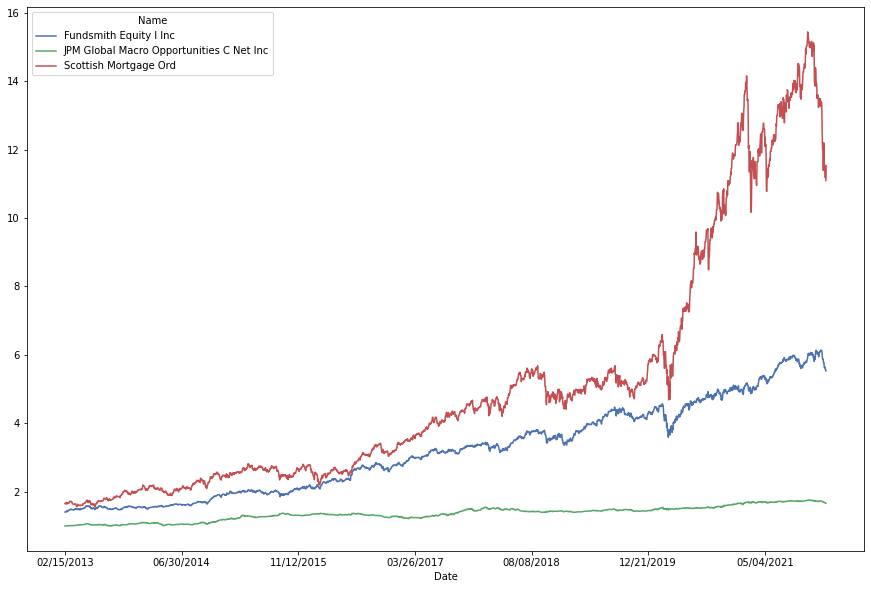

In [134]:
concatenated_df_pivot.plot(figsize=(15,10))

## Calculating the covariance matrix

In [135]:
import pypfopt
pypfopt.__version__

'1.5.1'

In [136]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(concatenated_df_pivot, frequency=252)
sample_cov

Name,Fundsmith Equity I Inc,JPM Global Macro Opportunities C Net Inc,Scottish Mortgage Ord
Name,,,
Fundsmith Equity I Inc,0.013283,0.002410,0.007838
JPM Global Macro Opportunities C Net Inc,0.002410,0.003225,0.001416
Scottish Mortgage Ord,0.007838,0.001416,0.043757


<AxesSubplot:>

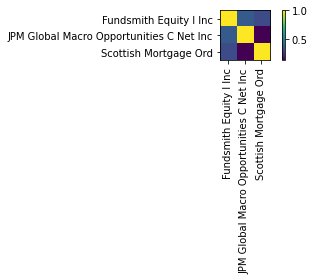

In [137]:
plotting.plot_covariance(sample_cov, plot_correlation=True)

## Return estimation

In [138]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(concatenated_df_pivot)
mu

Name
Fundsmith Equity I Inc                      0.094467
JPM Global Macro Opportunities C Net Inc    0.042315
Scottish Mortgage Ord                       0.187754
Name: mkt, dtype: float64

<AxesSubplot:ylabel='Name'>

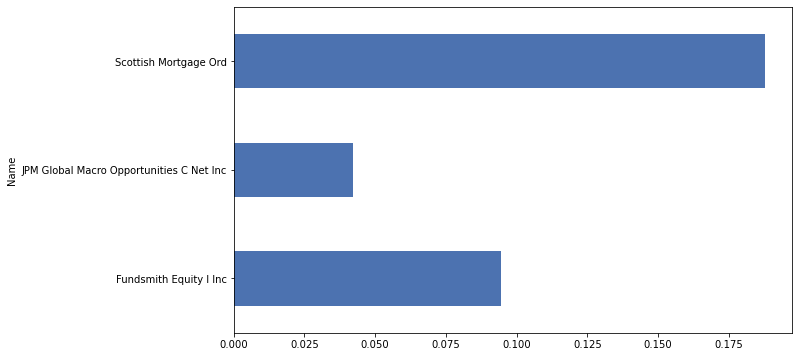

In [139]:
mu.plot.barh(figsize=(10,6))

## Long/short min variance

In [140]:
from pypfopt import EfficientFrontier

In [141]:
S = risk_models.CovarianceShrinkage(concatenated_df_pivot).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(0, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('Fundsmith Equity I Inc', 0.06362),
             ('JPM Global Macro Opportunities C Net Inc', 0.90161),
             ('Scottish Mortgage Ord', 0.03478)])

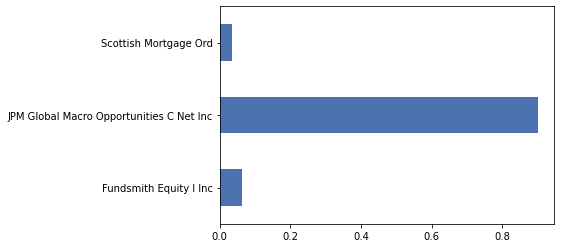

In [142]:
pd.Series(weights).plot.barh();

In [143]:
ef.portfolio_performance(verbose=True);

Annual volatility: 5.7%


In [144]:
from pypfopt import DiscreteAllocation

latest_prices = concatenated_df_pivot.iloc[-1]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=12000, short_ratio=0.1)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Discrete allocation performed with $1.12 leftover


{'Fundsmith Equity I Inc': 138,
 'JPM Global Macro Opportunities C Net Inc': 6487,
 'Scottish Mortgage Ord': 38}

## Max Sharpe

In [145]:
S = risk_models.CovarianceShrinkage(concatenated_df_pivot).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weights = ef.clean_weights()
weights

OrderedDict([('Fundsmith Equity I Inc', 0.33931),
             ('JPM Global Macro Opportunities C Net Inc', 0.32073),
             ('Scottish Mortgage Ord', 0.33995)])

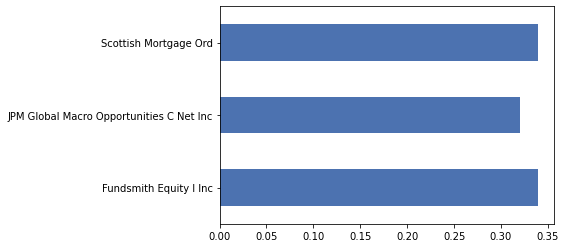

In [146]:
pd.Series(weights).plot.barh();

In [147]:
ef.portfolio_performance(verbose=True);

Expected annual return: 10.9%
Annual volatility: 9.8%
Sharpe Ratio: 0.92


In [148]:
latest_prices = concatenated_df_pivot.iloc[-1]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=12000, short_ratio=0.1)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Discrete allocation performed with $1.24 leftover


{'Fundsmith Equity I Inc': 736,
 'JPM Global Macro Opportunities C Net Inc': 2306,
 'Scottish Mortgage Ord': 368}

## Maximise return for a given risk, with L2 regularisation

In [152]:
ef = EfficientFrontier(mu, S)
ef.efficient_risk(target_volatility=0.12)
weights = ef.clean_weights()
weights

OrderedDict([('Fundsmith Equity I Inc', 0.43132),
             ('JPM Global Macro Opportunities C Net Inc', 0.12689),
             ('Scottish Mortgage Ord', 0.44178)])

In [153]:
ef.portfolio_performance(verbose=True)

Expected annual return: 12.9%
Annual volatility: 12.0%
Sharpe Ratio: 0.91


(0.12906214742330374, 0.11999999986210648, 0.9088512295719036)

In [154]:
from pypfopt import objective_functions

# You must always create a new efficient frontier object
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamme is the tuning parameter
ef.efficient_risk(0.15)
weights = ef.clean_weights()
weights

OrderedDict([('Fundsmith Equity I Inc', 0.28838),
             ('JPM Global Macro Opportunities C Net Inc', 0.06341),
             ('Scottish Mortgage Ord', 0.64822)])

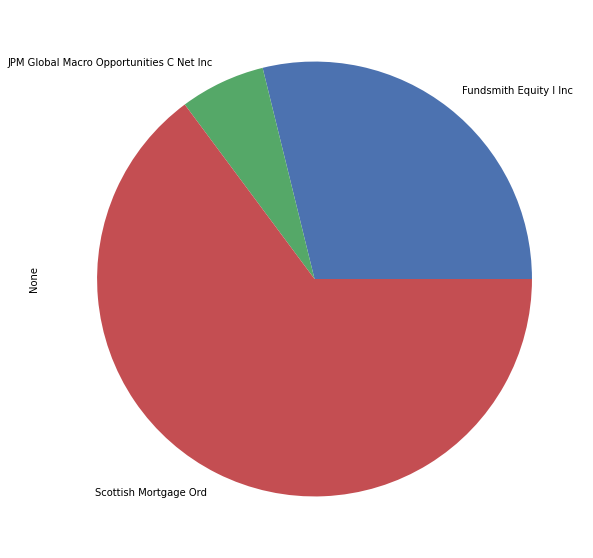

In [155]:
pd.Series(weights).plot.pie(figsize=(10, 10));

## Minimise risk for a given return, market-neutral

In [156]:
# Must have no weight bounds to allow shorts
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.10, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('Fundsmith Equity I Inc', -0.12153),
             ('JPM Global Macro Opportunities C Net Inc', -0.60962),
             ('Scottish Mortgage Ord', 0.73115)])

In [157]:
ef.portfolio_performance(verbose=True);

Expected annual return: 10.0%
Annual volatility: 15.0%
Sharpe Ratio: 0.53


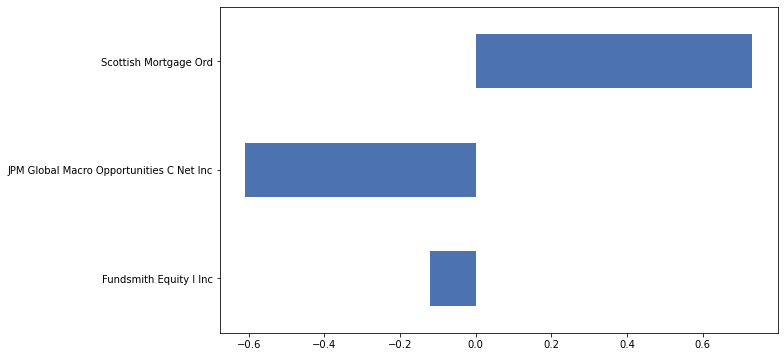

In [158]:
pd.Series(weights).plot.barh(figsize=(10,6));

In [159]:
print(f"Net weight: {sum(weights.values()):.2f}")

Net weight: -0.00


## Efficient semi-variance optimization

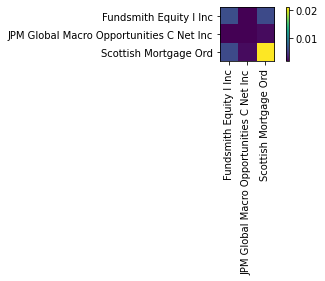

In [160]:
semicov = risk_models.semicovariance(concatenated_df_pivot, benchmark=0)
plotting.plot_covariance(semicov);

In [161]:
ef = EfficientFrontier(mu, semicov)
ef.efficient_return(0.06)
weights = ef.clean_weights()
weights

OrderedDict([('Fundsmith Equity I Inc', 0.11219),
             ('JPM Global Macro Opportunities C Net Inc', 0.80644),
             ('Scottish Mortgage Ord', 0.08137)])

In [162]:
ef.portfolio_performance(verbose=True);

Expected annual return: 6.0%
Annual volatility: 4.4%
Sharpe Ratio: 0.92


In [163]:
returns = expected_returns.returns_from_prices(concatenated_df_pivot)
returns = returns.dropna()

In [164]:
from pypfopt import EfficientSemivariance

es = EfficientSemivariance(mu, returns)
es.efficient_return(0.06)
es.portfolio_performance(verbose=True);

Expected annual return: 6.0%
Annual semi-deviation: 4.2%
Sortino Ratio: 0.95


C:\Users\Ferhat\Anaconda3\envs\py39\lib\site-packages\cvxpy\problems\problem.py:1296: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [165]:
es.weights = ef.weights
es.portfolio_performance(verbose=True);

Expected annual return: 6.0%
Annual semi-deviation: 4.0%
Sortino Ratio: 0.99


## Efficient CVaR optimization

In [166]:
returns = expected_returns.returns_from_prices(concatenated_df_pivot).dropna()
returns.head()

Name,Fundsmith Equity I Inc,JPM Global Macro Opportunities C Net Inc,Scottish Mortgage Ord
Date,,,
02/16/2013,0.000000,0.000000,0.000000
02/17/2013,0.000000,0.000000,0.000000
02/18/2013,0.003759,0.005000,-0.004828
02/19/2013,0.000353,0.000995,0.013948
02/20/2013,0.014832,0.000000,0.009569


In [167]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True);

Expected annual return: 10.9%
Annual volatility: 9.8%
Sharpe Ratio: 0.92


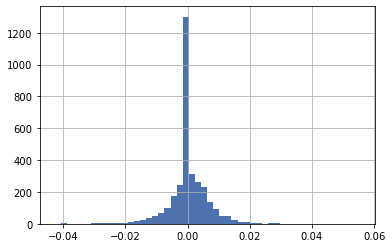

In [168]:
# Compute CVaR
portfolio_rets = (returns * weight_arr).sum(axis=1)
portfolio_rets.hist(bins=50);

In [169]:
# VaR
var = portfolio_rets.quantile(0.05)
cvar = portfolio_rets[portfolio_rets <= var].mean()
print("VaR: {:.2f}%".format(100*var))
print("CVaR: {:.2f}%".format(100*cvar))

VaR: -0.98%
CVaR: -1.54%


In [170]:
from pypfopt import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.min_cvar()
ec.portfolio_performance(verbose=True);

Expected annual return: 4.8%
Conditional Value at Risk: 0.87%


In [171]:
from pypfopt import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.efficient_risk(target_cvar=0.025)
ec.portfolio_performance(verbose=True);

Expected annual return: 15.7%
Conditional Value at Risk: 2.50%


## Plotting - Unconstrained

In [172]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 8.6%
Annual volatility: 7.5%
Sharpe Ratio: 0.89


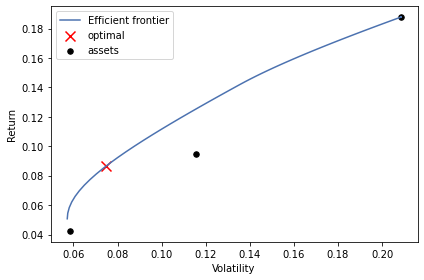

In [173]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

## Complex plots

In [174]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Sample portfolio returns:", rets)
print("Sample portfolio volatilities:", stds)

Sample portfolio returns: [0.1122775  0.12398388 0.11930736 ... 0.08838372 0.08644756 0.13623914]
Sample portfolio volatilities: 0       0.101540
1       0.115355
2       0.114484
3       0.060357
4       0.159732
          ...   
9995    0.067439
9996    0.079865
9997    0.086231
9998    0.080816
9999    0.129139
Length: 10000, dtype: float64


In [176]:
concatenated_df_pivot

Name,Fundsmith Equity I Inc,JPM Global Macro Opportunities C Net Inc,Scottish Mortgage Ord
Date,,,
02/15/2013,1.4101,1.000,1.657
02/16/2013,1.4101,1.000,1.657
02/17/2013,1.4101,1.000,1.657
02/18/2013,1.4154,1.005,1.649
02/19/2013,1.4159,1.006,1.672
...,...,...,...
01/17/2022,5.6414,1.684,11.495
01/18/2022,5.6396,1.683,11.185
01/19/2022,5.5615,1.673,11.180


In [177]:
returns = np.log(concatenated_df_pivot/concatenated_df_pivot.shift(1))
returns

Name,Fundsmith Equity I Inc,JPM Global Macro Opportunities C Net Inc,Scottish Mortgage Ord
Date,,,
02/15/2013,NaN,NaN,NaN
02/16/2013,0.000000,0.000000,0.000000
02/17/2013,0.000000,0.000000,0.000000
02/18/2013,0.003752,0.004988,-0.004840
02/19/2013,0.000353,0.000995,0.013851
...,...,...,...
01/17/2022,0.002023,-0.001187,0.007860
01/18/2022,-0.000319,-0.000594,-0.027339
01/19/2022,-0.013945,-0.005959,-0.000447


array([[<AxesSubplot:title={'center':'Fundsmith Equity I Inc'}>,
        <AxesSubplot:title={'center':'JPM Global Macro Opportunities C Net Inc'}>],
       [<AxesSubplot:title={'center':'Scottish Mortgage Ord'}>,
        <AxesSubplot:>]], dtype=object)

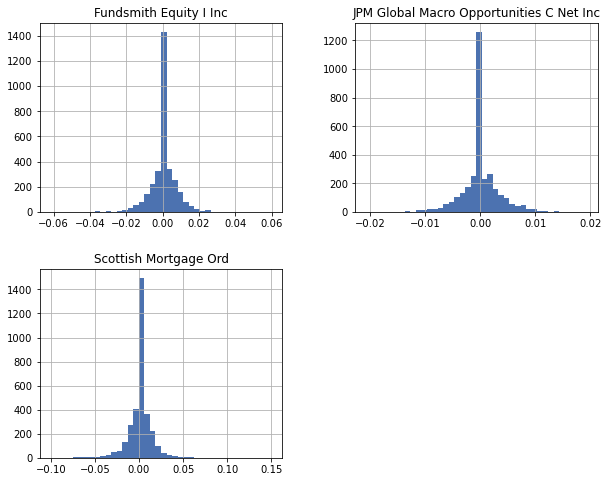

In [178]:
returns.hist(bins=40, figsize=(10,8))

In [181]:
agg_returns = returns * weights

In [245]:
portfolio_return = agg_returns.sum(axis=1)
portfolio_return

Date
02/15/2013    0.000000
02/16/2013    0.000000
02/17/2013    0.000000
02/18/2013    0.004049
02/19/2013    0.001969
                ...   
01/17/2022   -0.000091
01/18/2022   -0.002739
01/19/2022   -0.006407
01/20/2022    0.002224
01/21/2022   -0.006335
Length: 3263, dtype: float64

In [246]:
portfolio_return.name = 'Close'

In [247]:
portfolio_return

Date
02/15/2013    0.000000
02/16/2013    0.000000
02/17/2013    0.000000
02/18/2013    0.004049
02/19/2013    0.001969
                ...   
01/17/2022   -0.000091
01/18/2022   -0.002739
01/19/2022   -0.006407
01/20/2022    0.002224
01/21/2022   -0.006335
Name: Close, Length: 3263, dtype: float64

In [253]:
portfolio_return.index

Index(['02/15/2013', '02/16/2013', '02/17/2013', '02/18/2013', '02/19/2013',
       '02/20/2013', '02/21/2013', '02/22/2013', '02/23/2013', '02/24/2013',
       ...
       '01/12/2022', '01/13/2022', '01/14/2022', '01/15/2022', '01/16/2022',
       '01/17/2022', '01/18/2022', '01/19/2022', '01/20/2022', '01/21/2022'],
      dtype='object', name='Date', length=3263)

In [254]:
portfolio_return.index = pd.to_datetime(portfolio_return.index)

In [255]:
portfolio_return.index

DatetimeIndex(['2013-02-15', '2013-02-16', '2013-02-17', '2013-02-18',
               '2013-02-19', '2013-02-20', '2013-02-21', '2013-02-22',
               '2013-02-23', '2013-02-24',
               ...
               '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15',
               '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19',
               '2022-01-20', '2022-01-21'],
              dtype='datetime64[ns]', name='Date', length=3263, freq=None)

In [215]:
#portfolio_return = portfolio_return.to_frame()

In [216]:
#portfolio_return = portfolio_return.reset_index()

In [ ]:
#portfolio_return = portfolio_return.rename(columns={'Date':'date', 0:'returns'})
#portfolio_return

In [221]:
#portfolio_return['date'] = pd.to_datetime(portfolio_return['date'])

In [225]:
import quantstats as qs

In [227]:
qs.extend_pandas()

In [260]:
qs.reports.html(portfolio_return, "SPY", output = 'portfolio_html.html')

In [236]:
qs.stats.sharpe(portfolio_return)

0.9646816441215103